<a href="https://colab.research.google.com/github/jlululu/PNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical, plot_model
from keras.models import Sequential, Model, load_model
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization

Loading data

In [ ]:
(x_train,labels_train),(x_test,labels_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
y_train = to_categorical(labels_train,10)
y_test = to_categorical(labels_test,10)

Construct NN

In [ ]:
net = Sequential()
net.add(Conv2D(32,(5,5),activation='relu',input_shape=(28,28,1)))
net.add(BatchNormalization())
net.add(Conv2D(64,(3,3),activation='relu'))
net.add(MaxPool2D(pool_size=(2,2)))
net.add(Flatten())
net.add(Dense(256,activation='relu'))
net.add(Dropout(0.5))
net.add(Dense(10,activation='softmax'))

Training

Epoch 1/8
285/285 [==============================] - 4s 11ms/step - loss: 0.0348 - val_loss: 0.0286
Epoch 2/8
285/285 [==============================] - 3s 10ms/step - loss: 0.0262 - val_loss: 0.0261
Epoch 3/8
285/285 [==============================] - 3s 10ms/step - loss: 0.0251 - val_loss: 0.0298
Epoch 4/8
285/285 [==============================] - 3s 10ms/step - loss: 0.0205 - val_loss: 0.0308
Epoch 5/8
285/285 [==============================] - 3s 10ms/step - loss: 0.0214 - val_loss: 0.0308
Epoch 6/8
285/285 [==============================] - 3s 10ms/step - loss: 0.0151 - val_loss: 0.0307
Epoch 7/8
285/285 [==============================] - 3s 10ms/step - loss: 0.0168 - val_loss: 0.0295
Epoch 8/8
285/285 [==============================] - 3s 10ms/step - loss: 0.0139 - val_loss: 0.0278
Percentage of missclassified =  0.64


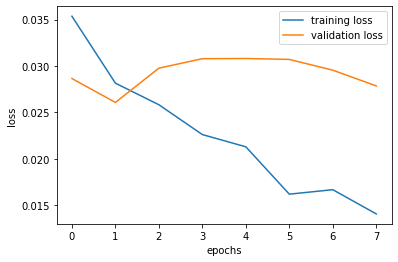

In [ ]:
net.compile(loss='categorical_crossentropy', optimizer='adam')
history = net.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=8, batch_size=211)
plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
labels_predicted = net.predict(x_test)
outputs = net.predict(x_test)
labels_predicted = np.argmax(outputs, axis=1)
misclassified = sum(labels_predicted != labels_test)
print('Percentage of missclassified = ',100*misclassified/labels_test.size)